## モジュール宣言

In [21]:
import pandas as pd
import MeCab
import ipadic
from collections import Counter
import re
import matplotlib.pyplot as plt
import japanize_matplotlib

## データ抽出

### 現場から

In [22]:
data=pd.read_csv("./朝ポキ出演者 共同編集用 スプレッドシート - ニュースの現場から.csv")
data.head()

,omny.fm へのリンク,日付,タイトル,コメント,MC,出演者1,出演者2,出演者3,音源編集,備考・メモ・作業された方のお名前(ハンドルネーム可)
0,https://omny.fm/shows/asahi/9-ny-1,"Thu, 06 Aug 2020 02:06:00 +0000",#1 ニューヨーク 感染爆発、でも9割が対応支持 NY覆う「戦時の空気」,NaN,神田大介,"藤原学思,ニューヨーク支局",NaN,NaN,NaN,いーむ（em_em000）
1,https://omny.fm/shows/asahi/9-ny,"Sat, 08 Aug 2020 02:00:00 +0000",#2 ローマ 奔放イタリア、コロナで見せた従順 マフィアのボスも…,NaN,神田大介,"河原田慎一,ローマ支局",NaN,NaN,NaN,いーむ（em_em000）
2,https://omny.fm/shows/asahi/28bbd9d5-fe0e-4a05...,"Sun, 09 Aug 2020 02:00:00 +0000",#3 モスクワ① 医師が事実を訴えると、警察くるロシア プーチン氏は…,NaN,神田大介,"石橋亮介,モスクワ支局",NaN,NaN,NaN,いーむ（em_em000）
3,https://omny.fm/shows/asahi/c4b6b21d-f0c6-4bfe...,"Sun, 09 Aug 2020 02:00:00 +0000",#4 モスクワ② 緊急事態宣言、出さないプーチン大統領 抗議もバーチャル,NaN,神田大介,"石橋亮介,モスクワ支局",NaN,NaN,NaN,いーむ（em_em000）
4,https://omny.fm/shows/asahi/9afa3ecf-29ff-4faa...,"Sun, 09 Aug 2020 02:01:00 +0000",#5 モスクワ③ 実は欧米より制限ゆるかったロシア 日本を見て驚いた,NaN,神田大介,"石橋亮介,モスクワ支局",NaN,NaN,NaN,いーむ（em_em000）


### メディアトーク

In [19]:
data=pd.read_csv("./朝ポキ出演者 共同編集用 スプレッドシート - メディアトーク.csv")
data.head()

,omny.fm へのリンク,日付,タイトル,コメント,MC,出演者1,出演者2,出演者3,音源編集,備考・メモ・作業された方のお名前(ハンドルネーム可)
0,https://omny.fm/shows/asahi/d08ba6e2-439c-4497...,"Thu, 06 Aug 2020 02:47:00 +0000",#1 東京オリンピック、本当に開催できる？ 「普通に考えたら…」,NaN,神田大介,"稲垣康介,編集委員",NaN,NaN,NaN,bajibu
1,https://omny.fm/shows/asahi/2-1-75,"Wed, 12 Aug 2020 01:00:00 +0000",#2-1 被爆75年 燃えた誰かの背中、自分を見ると…声で残す被爆者の思い,NaN,神田大介,"武田肇,朝日新聞大阪社会部",片桐安子,NaN,NaN,bajibu
2,https://omny.fm/shows/asahi/2-2-75,"Thu, 13 Aug 2020 01:00:00 +0000",#2-2 被爆75年 ただ怖く、助ける気持ちは生まれない 講演で語った記憶,NaN,神田大介,"伊藤繭莉,朝日新聞西部報道センター",山口美代子,NaN,NaN,bajibu
3,https://omny.fm/shows/asahi/af8e73b9-1824-400d...,"Thu, 13 Aug 2020 09:00:00 +0000",#2-3 被爆75年 被爆者の記憶、コンサートで残す いつも歌った青春を,NaN,神田大介,"伊藤繭莉,朝日新聞西部報道センター",山口美代子,NaN,NaN,bajibu
4,https://omny.fm/shows/asahi/b24b9ba0-bb09-4a93...,"Sat, 15 Aug 2020 02:00:00 +0000",#2-4 被爆75年 私は話す、夫は語らぬ ノートの問いかけに答えた被爆者,NaN,神田大介,"榎本瑞希,朝日新聞長崎総局",浦部豊子,NaN,NaN,bajibu


### SDGs

In [30]:
data=pd.read_csv("./朝ポキ出演者 共同編集用 スプレッドシート - SDGs.csv")
data.head()

,omny.fm へのリンク,日付,タイトル,コメント,MC,出演者1,出演者2,出演者3,音源編集,備考・メモ・作業された方のお名前(ハンドルネーム可)
0,https://omny.fm/shows/asahi/sdgs-11-1-0,"Sun, 24 Oct 2021 19:00:00 +0000",SDGsのこと、シンプルに話そう 11月1日スタート #0,NaN,"神田大介,音声ディレクター,コンテンツ編成本部",NaN,NaN,NaN,NaN,ネジート
1,https://omny.fm/shows/asahi/sdgs-1,"Sun, 31 Oct 2021 19:00:00 +0000",SDGsって、きれいごと？ ハフポスト前編集長の竹下隆一郎さんと話した（前編） #1,NaN,"神田大介,音声ディレクター,コンテンツ編成本部","竹下隆一郎,PIVOT執行役員,ハフィントンポスト日本版前編集長",NaN,NaN,NaN,ネジート
2,https://omny.fm/shows/asahi/sdgs-2,"Mon, 01 Nov 2021 19:00:00 +0000",SDGs、大企業がいいように使ってない？ 竹下隆一郎さんと話した（中編） #2,NaN,"神田大介,音声ディレクター,コンテンツ編成本部","竹下隆一郎,PIVOT執行役員,ハフィントンポスト日本版前編集長",NaN,NaN,NaN,ネジート
3,https://omny.fm/shows/asahi/sdgs-3,"Tue, 02 Nov 2021 19:00:00 +0000",SDGsとは、矛盾を受け入れることかも 竹下隆一郎さんと話した（後編） #3,NaN,"神田大介,音声ディレクター,コンテンツ編成本部","竹下隆一郎,PIVOT執行役員,ハフィントンポスト日本版前編集長",NaN,NaN,NaN,ネジート
4,https://omny.fm/shows/asahi/lgbt-4,"Wed, 03 Nov 2021 19:00:00 +0000",（再）スポーツとLGBT① トランスジェンダー女性、五輪に初出場 #4,NaN,"神田大介,音声ディレクター,コンテンツ編成本部","忠鉢信一,東京スポーツ部",NaN,NaN,NaN,ネジート


## テスト分析

In [15]:
tagger = MeCab.Tagger(ipadic.MECAB_ARGS)
print(tagger.parse("ニューヨーク　感染爆発、でも9割が対応支持　NY覆う「戦時の空気」"))

ニューヨーク	名詞,固有名詞,地域,一般,*,*,ニューヨーク,ニューヨーク,ニューヨーク
　	記号,空白,*,*,*,*,　,　,　
感染	名詞,サ変接続,*,*,*,*,感染,カンセン,カンセン
爆発	名詞,サ変接続,*,*,*,*,爆発,バクハツ,バクハツ
、	記号,読点,*,*,*,*,、,、,、
でも	接続詞,*,*,*,*,*,でも,デモ,デモ
9	名詞,数,*,*,*,*,*
割	名詞,接尾,助数詞,*,*,*,割,ワリ,ワリ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
対応	名詞,サ変接続,*,*,*,*,対応,タイオウ,タイオー
支持	名詞,サ変接続,*,*,*,*,支持,シジ,シジ
　	記号,空白,*,*,*,*,　,　,　
NY	名詞,固有名詞,組織,*,*,*,*
覆う	動詞,自立,*,*,五段・ワ行促音便,基本形,覆う,オオウ,オオウ
「	記号,括弧開,*,*,*,*,「,「,「
戦時	名詞,一般,*,*,*,*,戦時,センジ,センジ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
空気	名詞,一般,*,*,*,*,空気,クウキ,クーキ
」	記号,括弧閉,*,*,*,*,」,」,」
EOS



In [16]:
texts="ニューヨーク　感染爆発、でも9割が対応支持　NY覆う「戦時の空気」"
node=tagger.parseToNode(texts)
wordsList=[]
while node:
    print("-----")
    print(node)
    word=node.surface
    print("{0}".format(word))
    wordsList.append(word)
    node=node.next

-----
<Swig Object of type 'MeCab::Node *' at 0x1305ef6f0>

-----
<Swig Object of type 'MeCab::Node *' at 0x103475a70>
ニューヨーク
-----
<Swig Object of type 'MeCab::Node *' at 0x1305ef6f0>
　
-----
<Swig Object of type 'MeCab::Node *' at 0x103475a70>
感染
-----
<Swig Object of type 'MeCab::Node *' at 0x1305ef6f0>
爆発
-----
<Swig Object of type 'MeCab::Node *' at 0x1304670f0>
、
-----
<Swig Object of type 'MeCab::Node *' at 0x1305ef6f0>
でも
-----
<Swig Object of type 'MeCab::Node *' at 0x1304670f0>
9
-----
<Swig Object of type 'MeCab::Node *' at 0x1305ef6f0>
割
-----
<Swig Object of type 'MeCab::Node *' at 0x103475a70>
が
-----
<Swig Object of type 'MeCab::Node *' at 0x1305ef6f0>
対応
-----
<Swig Object of type 'MeCab::Node *' at 0x103475a70>
支持
-----
<Swig Object of type 'MeCab::Node *' at 0x1305ef6f0>
　
-----
<Swig Object of type 'MeCab::Node *' at 0x103475a70>
NY
-----
<Swig Object of type 'MeCab::Node *' at 0x1304670f0>
覆う
-----
<Swig Object of type 'MeCab::Node *' at 0x103475a70>
「
-----
<Swig O

##　本分析

### タイトルの結合

In [23]:
titleAll=""
for title in data["タイトル"] :
    titleAll=titleAll+title
print(titleAll)

#1 ニューヨーク　感染爆発、でも9割が対応支持　NY覆う「戦時の空気」#2 ローマ　奔放イタリア、コロナで見せた従順　マフィアのボスも…#3 モスクワ①　医師が事実を訴えると、警察くるロシア　プーチン氏は…#4 モスクワ②　緊急事態宣言、出さないプーチン大統領　抗議もバーチャル#5 モスクワ③　実は欧米より制限ゆるかったロシア　日本を見て驚いた#6 シンガポール①　ロボット犬がにらんでる　「管理社会」の理詰めコロナ策#7 シンガポール②　沈黙の飯場、コロナを拡散　政府はSIMカードを配った#8 シンガポール③　状況いいのに評価は…　外から見た日本「もったいない」#9 東京オリンピック、本当に開催できる？　「普通に考えたら…」#10 ヨハネスブルク　禁酒、コロナに効果あり？　南アフリカで驚きのデータ#11 サンパウロ①　感染爆発ブラジル　スラムで見た「超濃厚接触」の不可避#12 サンパウロ②　暴走「トロピカル・トランプ」　見え隠れする福音派の影#13 あのベネズエラ、コロナでどうなった　水さえ出ない病院#14 小池都知事①　東京アラート、いったい何だった？#15 小池都知事②　「東京五輪の延期を待っていて、コロナ対応が遅れた」って本当？#16 小池都知事③　都知事選圧勝の理由、小池氏にとって「都民ファースト」とは#17 小池都知事④　会見で皮肉連発、本人も認めていた「粛清人事」#18 小池都知事⑤　人気ぶり、マスコミの責任は　小池氏は首相を狙うのか読めなかった夫の日記に刻まれていた苦悩、そして最後の一言　被爆44年後の発病#19 「アベノマスク」さらに8000万枚　調査報道が暴いた追加計画の闇#20 「アベノマスク」契約書、隠されていた事実　しどろもどろの答弁#21 「アベノマスク」外した安倍首相　なぜ政府はこだわり、あきらめたのか#22 武漢①　1000万人PCR、本当に意味があるのか　武漢の答え#23 武漢②　戻った日常、戻らない笑顔　コロナ後の中国に残った差別#24 武漢③　コロナ拡大、止められなかった世界　中国に責任はあるか#25 鳴らない電話、記事に8カ月　調査報道の舞台裏話します#26 「血で血を洗う選挙」勝った菅義偉氏　創価学会との宿縁#27 自分いないと回らない状態に　菅義偉氏の上り詰める手法#28 イスタンブール　コロナ拡大、でも経済止めない　トル

### Mecabエンジンで分析

In [24]:
K_parsed = tagger.parse(titleAll)
print(K_parsed)

#	記号,一般,*,*,*,*,*
1	名詞,数,*,*,*,*,*
ニューヨーク	名詞,固有名詞,地域,一般,*,*,ニューヨーク,ニューヨーク,ニューヨーク
　	記号,空白,*,*,*,*,　,　,　
感染	名詞,サ変接続,*,*,*,*,感染,カンセン,カンセン
爆発	名詞,サ変接続,*,*,*,*,爆発,バクハツ,バクハツ
、	記号,読点,*,*,*,*,、,、,、
でも	接続詞,*,*,*,*,*,でも,デモ,デモ
9	名詞,数,*,*,*,*,*
割	名詞,接尾,助数詞,*,*,*,割,ワリ,ワリ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
対応	名詞,サ変接続,*,*,*,*,対応,タイオウ,タイオー
支持	名詞,サ変接続,*,*,*,*,支持,シジ,シジ
　	記号,空白,*,*,*,*,　,　,　
NY	名詞,固有名詞,組織,*,*,*,*
覆う	動詞,自立,*,*,五段・ワ行促音便,基本形,覆う,オオウ,オオウ
「	記号,括弧開,*,*,*,*,「,「,「
戦時	名詞,一般,*,*,*,*,戦時,センジ,センジ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
空気	名詞,一般,*,*,*,*,空気,クウキ,クーキ
」	記号,括弧閉,*,*,*,*,」,」,」
#	記号,一般,*,*,*,*,*
2	名詞,数,*,*,*,*,*
ローマ	名詞,固有名詞,地域,一般,*,*,ローマ,ローマ,ローマ
　	記号,空白,*,*,*,*,　,　,　
奔放	名詞,形容動詞語幹,*,*,*,*,奔放,ホンポウ,ホンポー
イタリア	名詞,固有名詞,地域,国,*,*,イタリア,イタリア,イタリア
、	記号,読点,*,*,*,*,、,、,、
コロナ	名詞,一般,*,*,*,*,コロナ,コロナ,コロナ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
見せ	動詞,自立,*,*,一段,連用形,見せる,ミセ,ミセ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
従順	名詞,一般,*,*,*,*,従順,ジュウジュン,ジュージュン
　	記号,空白,*,*,*,*,　,　,　
マフィア	名詞,固有名詞,組織,*,*,*,マフィア,マフィア,マフィア
の	助詞,連体化,*,*,*,*,の,ノ,ノ
ボス	名詞,一般,*,*,*,*,ボス,ボス,ボス
も	助詞,係助詞,*,*,*,

### カウント

#### 一般名称をカウント（printで表示）

In [25]:
#念の為分析をもう一度
K_parsed = tagger.parse(titleAll)
#分析データを改行ごとに切り取り
K_parsed_lines = K_parsed.split('\n')

#処理に使うリストを作成
K_parsed_words = []
K_words = []
 
#各行のタブ（\t）を除去
for K_parsed_line in K_parsed_lines:
    K_parsed_words.append(re.split('[\t,]', K_parsed_line))
 
#名詞・一般に該当する単語をリストに格納
for K_parsed_word in K_parsed_words:
    if (    K_parsed_word[0] not in ('EOS', '') 
        and K_parsed_word[1] == '名詞'
        and K_parsed_word[2] == '固有名詞'):
        
            K_words.append(K_parsed_word[0])
 
# 出現頻度上位15語を抽出して表示
K_counter = Counter(K_words)
for K_word, K_count in K_counter.most_common(500):
    print('%s : %s' % (K_word, K_count))

日本 : 70
哲夫 : 54
中国 : 43
吉 : 43
弥 : 43
アメリカ : 28
東京 : 23
京都 : 23
沖縄 : 22
ウクライナ : 17
岸田 : 15
ロシア : 14
菅 : 14
大阪 : 14
ベトナム : 12
広島 : 12
自民党 : 11
リアル : 11
アフガン : 11
安倍 : 10
朝日新聞 : 10
米 : 10
韓国 : 10
関西 : 10
台湾 : 9
愛知 : 9
小池 : 8
インド : 8
ヒロシマ : 8
徳川 : 8
阪神 : 8
衆院 : 7
香港 : 7
ミャンマー : 7
自衛隊 : 7
家康 : 7
シンガポール : 6
スマ : 6
日 : 6
敬 : 6
坪井 : 6
直 : 6
源 : 6
名古屋 : 6
イギリス : 5
ニッポン : 5
ドイツ : 5
民主党 : 5
文雄 : 5
平 : 5
福島 : 5
欧州 : 5
長崎 : 5
藤井 : 5
寂聴 : 5
原 : 5
露 : 5
団 : 5
姫 : 5
那覇 : 5
北方領土 : 5
参院 : 5
サンフランシスコ : 5
甲子園 : 5
平等院 : 5
武漢 : 4
義 : 4
シリア : 4
永田町 : 4
ハリウッド : 4
北海道 : 4
フランス : 4
常見 : 4
北朝鮮 : 4
中村 : 4
哲 : 4
弥生 : 4
聡 : 4
太 : 4
白 : 4
鵬 : 4
広 : 4
シン : 4
愛 : 4
イラン : 4
鎌倉 : 4
頼朝 : 4
太郎 : 4
北関東 : 4
AI : 4
モスクワ : 3
ブラジル : 3
アベノマスク : 3
トルコ : 3
朝日 : 3
稲田 : 3
朋美 : 3
野田 : 3
聖子 : 3
ロンドン : 3
吉村 : 3
ノーベル : 3
石破 : 3
茂 : 3
久保 : 3
パリ : 3
中 : 3
SNS : 3
トヨタ : 3
照 : 3
富士 : 3
陽平 : 3
正 : 3
辺野古 : 3
岡山 : 3
ソ連 : 3
林 : 3
ABC : 3
アフガニスタン : 3
南極 : 3
イスラエル : 3
津田 : 3
大介 : 3
MEDIA : 3
上海 : 3
自民 : 3
韓 : 3
ロスジェネ : 3
M : 3
桑原 : 3
征 : 3
北新地 

#### 一般名詞をカウント

In [36]:
K_parsed = tagger.parse(titleAll)
K_parsed_lines = K_parsed.split('\n')

#処理に使うリストを作成
K_parsed_words = []
K_words = []
 
#各行のタブ（\t）を除去
for K_parsed_line in K_parsed_lines:
    K_parsed_words.append(re.split('[\t,]', K_parsed_line))
 
#名詞・一般に該当する単語をリストに格納
#for K_parsed_word in K_parsed_words:
#    if (    K_parsed_word[0] not in ('EOS', '') 
#        and K_parsed_word[1] == '名詞'):


for K_parsed_word in K_parsed_words:
    if (    K_parsed_word[0] not in ('EOS', '') 
        and K_parsed_word[1] == '名詞'
        and K_parsed_word[2] == '一般'):        
            K_words.append(K_parsed_word[0])
 
# 出現頻度上位15語を抽出して表示
K_counter = Counter(K_words)
wordCar=[]
wordNum=[]
for K_word, K_count in K_counter.most_common(500):
    wordCar.append(K_word)
    wordNum.append(K_count)

wordData=pd.DataFrame({"words":wordCar,"出現回数":wordNum})

#### 固有名詞をカウント

In [39]:
K_parsed = tagger.parse(titleAll)
K_parsed_lines = K_parsed.split('\n')

#処理に使うリストを作成
K_parsed_words = []
K_words = []
 
#各行のタブ（\t）を除去
for K_parsed_line in K_parsed_lines:
    K_parsed_words.append(re.split('[\t,]', K_parsed_line))
 
#名詞・一般に該当する単語をリストに格納
for K_parsed_word in K_parsed_words:
    if (    K_parsed_word[0] not in ('EOS', '') 
        and K_parsed_word[1] == '名詞'
        and K_parsed_word[2] == '固有名詞'):
        
            K_words.append(K_parsed_word[0])
 
# 出現頻度上位15語を抽出して表示
wordCar=[]
wordNum=[]
K_counter = Counter(K_words)
for K_word, K_count in K_counter.most_common(500):
    wordCar.append(K_word)
    wordNum.append(K_count)

wordData=pd.DataFrame({"words":wordCar,"出現回数":wordNum})

### 数以外の名詞を抽出

In [26]:
K_parsed = tagger.parse(titleAll)
K_parsed_lines = K_parsed.split('\n')

#処理に使うリストを作成
K_parsed_words = []
K_words = []
 
#各行のタブ（\t）を除去
for K_parsed_line in K_parsed_lines:
    K_parsed_words.append(re.split('[\t,]', K_parsed_line))
 
#名詞・一般に該当する単語をリストに格納
for K_parsed_word in K_parsed_words:
    if (    K_parsed_word[0] not in ('EOS', '') 
        and K_parsed_word[1] == '名詞'
        and K_parsed_word[2] != "数"):
        
            K_words.append(K_parsed_word[0])
 
# 出現頻度上位15語を抽出して表示
wordCar=[]
wordNum=[]
K_counter = Counter(K_words)
for K_word, K_count in K_counter.most_common(500):
    wordCar.append(K_word)
    wordNum.append(K_count)

wordData=pd.DataFrame({"words":wordCar,"出現回数":wordNum})

### 見える化

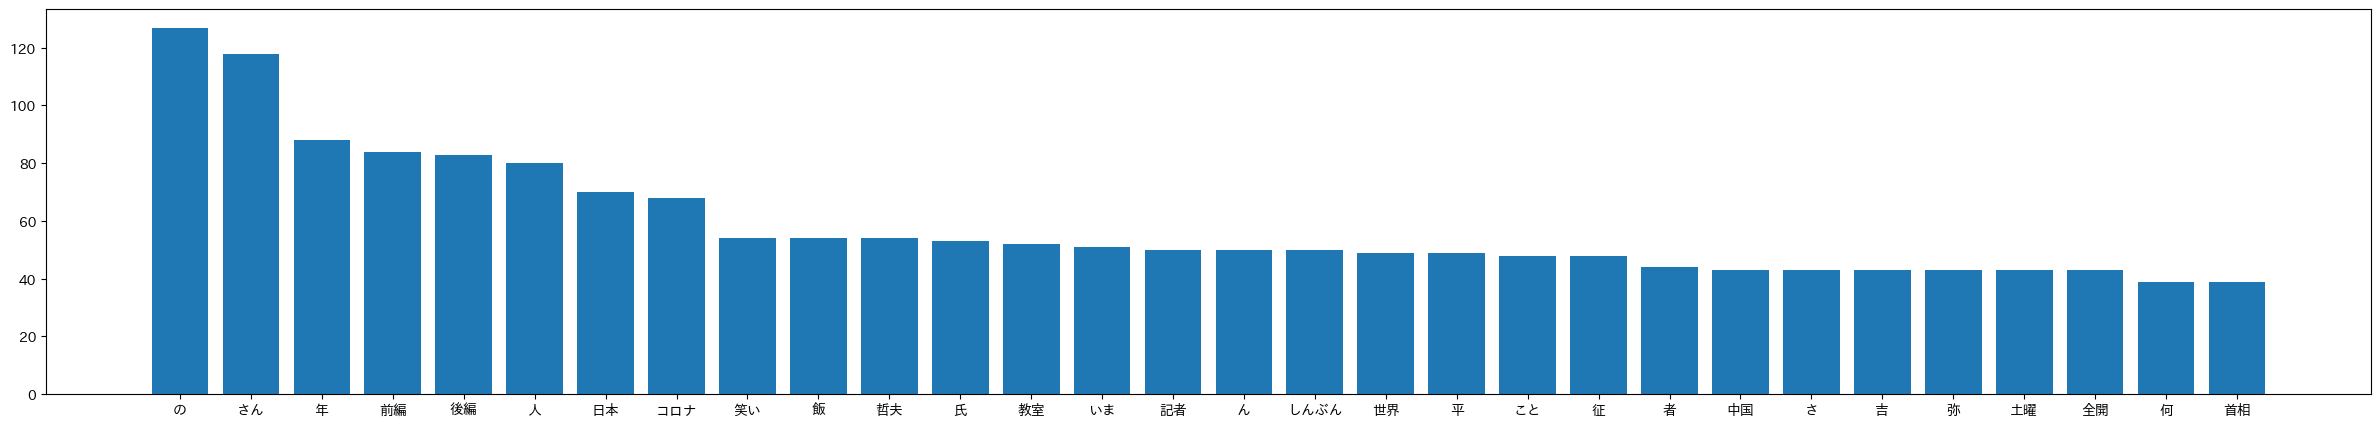

,words,出現回数
0,の,127
1,さん,118
2,年,88
3,前編,84
4,後編,83
...,...,...
495,北海道,4
496,監督,4
497,生命,4
498,過去,4


In [20]:
plt.figure(figsize=[30,5])
plt.bar(wordData["words"].head(30),wordData["出現回数"].head(30))
plt.show()
wordData

### データ保存

In [27]:
wordData.to_csv("./genbaAll.csv")

## 参考動詞でやってみた

In [170]:
K_parsed = tagger.parse(titleAll)
K_parsed_lines = K_parsed.split('\n')

#処理に使うリストを作成
K_parsed_words = []
K_words = []
 
#各行のタブ（\t）を除去
for K_parsed_line in K_parsed_lines:
    K_parsed_words.append(re.split('[\t,]', K_parsed_line))
 
#名詞・一般に該当する単語をリストに格納
for K_parsed_word in K_parsed_words:
    if (    K_parsed_word[0] not in ('EOS', '') 
        and K_parsed_word[1] == '動詞'):
        
            K_words.append(K_parsed_word[0])
 
# 出現頻度上位15語を抽出して表示
K_counter = Counter(K_words)
for K_word, K_count in K_counter.most_common(300):
    print('%s : %s' % (K_word, K_count))

し : 55
れ : 27
する : 25
い : 24
ある : 18
れる : 14
さ : 13
考える : 13
み : 12
いる : 11
やめ : 11
なる : 11
見え : 10
できる : 10
考え : 10
なっ : 9
聞く : 9
変わる : 9
話し : 8
あり : 8
見 : 7
でき : 7
変える : 7
てる : 6
られ : 6
き : 6
語る : 6
言え : 5
感じ : 5
学ぶ : 5
話そ : 4
て : 4
食べ : 4
られる : 4
ゆく : 4
起き : 4
変え : 4
広がる : 4
始め : 4
つくる : 4
あっ : 4
超え : 4
見る : 4
生き : 4
知っ : 4
思う : 4
たどっ : 4
耕さ : 4
言わ : 4
悩ん : 4
生きる : 4
語りつぐ : 4
働き : 3
追い詰め : 3
しまう : 3
増える : 3
消える : 3
支え : 3
愛す : 3
なくなる : 3
すぎる : 3
握る : 3
出 : 3
みる : 3
知ら : 3
すれ : 3
言っ : 3
見つけ : 3
超える : 3
透ける : 3
問いかけ : 3
摂 : 3
消え : 3
逃げ : 3
動い : 3
こぼれ落ちる : 3
変わっ : 3
泣い : 3
帰れ : 3
知ろ : 3
推し : 3
かけ : 3
のぼる : 3
使っ : 2
受け入れる : 2
捨て : 2
挑ん : 2
抑える : 2
忘れ : 2
捕れ : 2
忍び寄る : 2
聞い : 2
向け : 2
やってき : 2
答え : 2
求め : 2
くる : 2
選ば : 2
ひきこもり : 2
託し : 2
作ら : 2
なら : 2
始まっ : 2
増え : 2
ちゃう : 2
残る : 2
たどり着い : 2
来 : 2
向き合う : 2
支える : 2
語り合っ : 2
探し : 2
広がっ : 2
終わら : 2
消さ : 2
補う : 2
届い : 2
生き延び : 2
すぎ : 2
もん : 2
生まれる : 2
夢見 : 2
悩み : 2
防ぐ : 2
使わ : 2
会い : 2
刺さる : 2
始めよ : 2
語ろ : 2
語り : 2
せ : 2
上げ : 2
重ね : 2
襲わ : 2
